## Problem Set 2

#### Hasan Cetin, Lucas Belmudes

<nl>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline
from scipy.interpolate import interp1d

### Utility functions ###

In [3]:
def u_1(c):
    return np.log(c)

def u_2(c):
    return np.sqrt(c)

def u_3(c, α):
    return c**(1-α)/(1-α)

def u_3_2(c):
    α =2
    return c**(1-α)/(1-α)
def u_3_5(c):
    α = 5
    return c**(1-α)/(1-α)
def u_3_10(c):
    α =10
    return c**(1-α)/(1-α)

### Grids: ###

Following the lectures we create a Polynomially-Expanding Grid:

* First, create an equally-spaced [0,1] grid:
$$ \{\hat{x}_j : \hat{x}_j = \frac{j-1}{N-1}, j=1,...N\}$$

* Shift and expand the grid:

$$ x=\{x_j : x_j = a + (b-a) \hat{x_j}\}$$

where $\theta>1$ is the expansion factor.


In [4]:
X = np.linspace(0.1, 5, 501)
Y1 = np.linspace(0.1, 5, 10)
Y2 = np.linspace(0.1, 5, 20)
Y3 = np.linspace(0.1, 5, 300)

def Smart(grid, θ):
    return 0.1 + (4.9) * (np.linspace(0,1,grid)**θ)

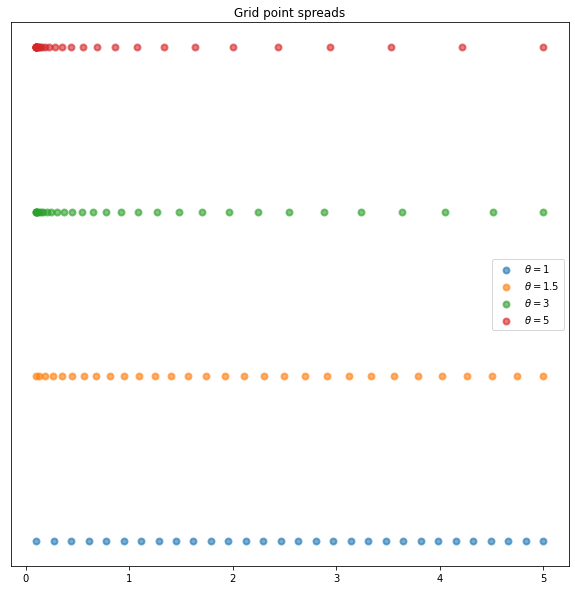

In [5]:
def zeros(x):
    return 0
zeros = np.vectorize(zeros)

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(Smart(30, 1), zeros(Smart(30, 1)) ,linewidth=2, label=r'$\theta = 1$', alpha=0.6)
ax.scatter(Smart(30, 1.5), 1+zeros(Smart(30, 1.5)) ,linewidth=2, label=r'$\theta = 1.5$', alpha=0.6)
ax.scatter(Smart(30, 3), 2+zeros(Smart(30, 3)) ,linewidth=2, label=r'$\theta = 3$', alpha=0.6)
ax.scatter(Smart(30, 5), 3+zeros(Smart(30, 5)) ,linewidth=2, label=r'$\theta = 5$', alpha=0.6)
plt.yticks([])
ax.legend()
plt.title("Grid point spreads")
plt.show()

## Method 1: Linear interpolation

If the two known points are given by the coordinates ${\displaystyle (x_{0},y_{0})}(x_{0},y_{0})$ and ${\displaystyle (x_{1},y_{1})}(x_{1},y_{1})$, the linear interpolant is the straight line between these points. For a value x in the interval ${\displaystyle (x_{0},x_{1})}(x_{0},x_{1})$, the value Smart(20,theta_w) along the straight line is given from the equation of slopes

$${\displaystyle {\frac {Smart(20,1)-y_{0}}{x-x_{0}}}={\frac {y_{1}-y_{0}}{x_{1}-x_{0}}},}{\displaystyle {\frac {Smart(20,1)-y_{0}}{x-x_{0}}}={\frac {y_{1}-y_{0}}{x_{1}-x_{0}}},}$$

which can be derived geometrically from the figure on the right. It is a special case of polynomial interpolation with n = 1.
Solving this equation for Smart(20,1), which is the unknown value at x, gives

$${\displaystyle {\begin{aligned}Smart(20,1)&=y_{0}+(x-x_{0}){\frac {y_{1}-y_{0}}{x_{1}-x_{0}}}\\&={\frac {y_{0}(x_{1}-x_{0})}{x_{1}-x_{0}}}+{\frac {y_{1}(x-x_{0})-y_{0}(x-x_{0})}{x_{1}-x_{0}}}\\&={\frac {y_{1}x-y_{1}x_{0}-y_{0}x+y_{0}x_{0}+y_{0}x_{1}-y_{0}x_{0}}{x_{1}-x_{0}}}\\&={\frac {y_{0}(x_{1}-x)+y_{1}(x-x_{0})}{x_{1}-x_{0}}},\end{aligned}}}$$

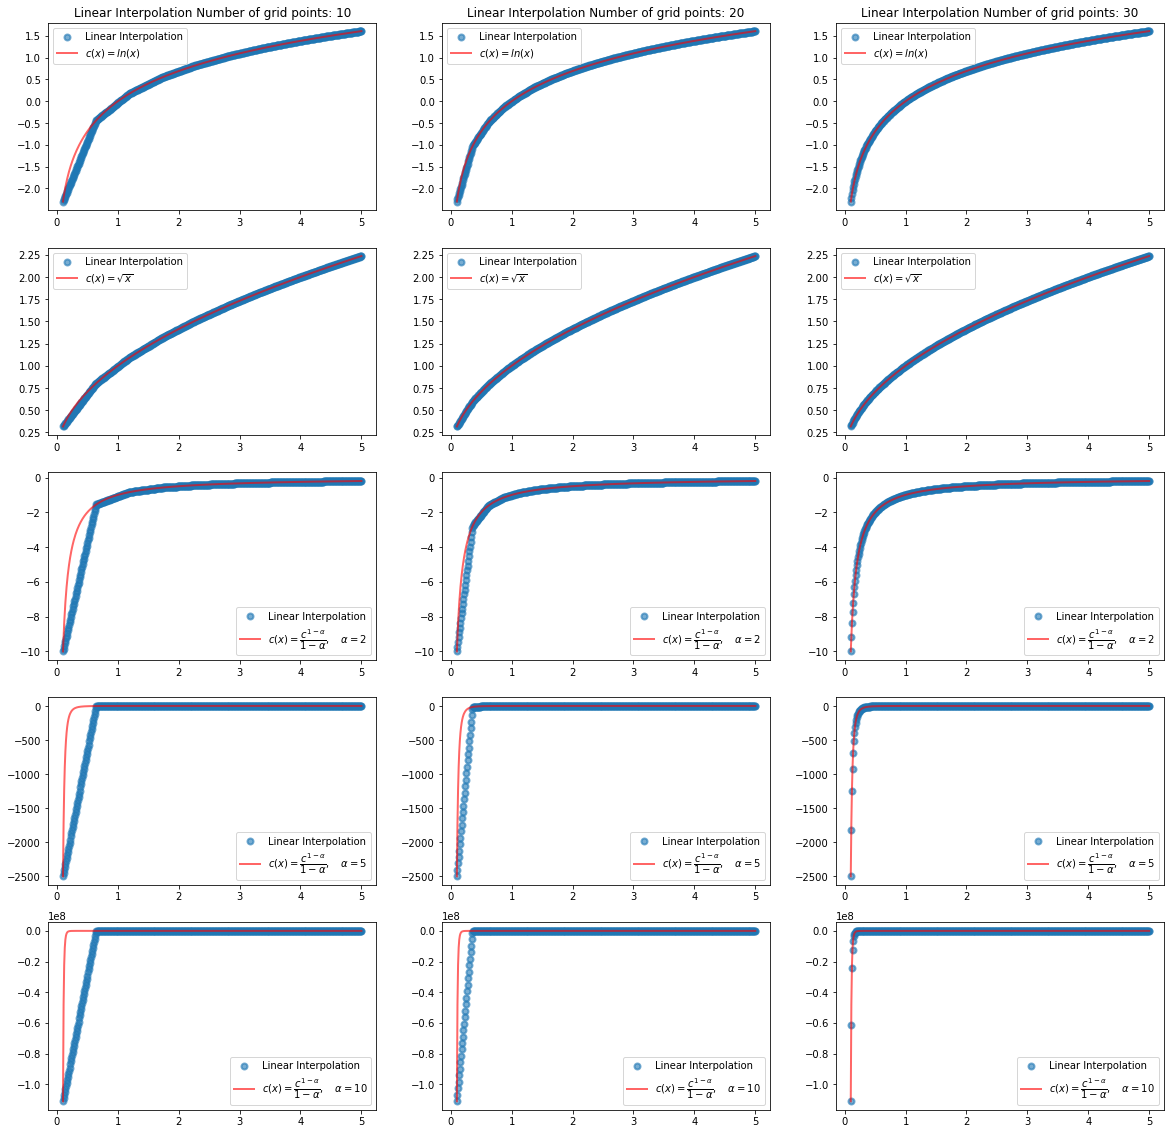

In [4]:
fig, ax = plt.subplots(5,3, figsize=(20,20))
ax[0,0].scatter(X, np.interp(X, Y1, u_1(Y1)), linewidth=2, label='Linear Interpolation', alpha=0.6)
ax[0,0].plot(X, u_1(X), 'r-', linewidth=2, label=r'$c(x)=ln(x)$', alpha=0.6)
ax[0,0].legend()
ax[0,0].set_title('Linear Interpolation Number of grid points: 10')
ax[1,0].scatter(X, np.interp(X, Y1, u_2(Y1)), linewidth=2, label='Linear Interpolation', alpha=0.6)
ax[1,0].plot(X, u_2(X), 'r-', linewidth=2, label=r'$c(x)=\sqrt{x}$', alpha=0.6)
ax[1,0].legend()
ax[2,0].scatter(X, np.interp(X, Y1, u_3(Y1, 2)), linewidth=2, label='Linear Interpolation', alpha=0.6)
ax[2,0].plot(X, u_3(X, 2), 'r-', linewidth=2, label=r'$c(x)=\dfrac{c^{1-\alpha}}{1-\alpha}, \quad \alpha = 2$', alpha=0.6)
ax[2,0].legend()
ax[3,0].scatter(X, np.interp(X, Y1, u_3(Y1, 5)), linewidth=2, label='Linear Interpolation', alpha=0.6)
ax[3,0].plot(X, u_3(X, 5), 'r-', linewidth=2, label=r'$c(x)=\dfrac{c^{1-\alpha}}{1-\alpha}, \quad \alpha = 5$', alpha=0.6)
ax[3,0].legend()
ax[4,0].scatter(X, np.interp(X, Y1, u_3(Y1, 10)), linewidth=2, label='Linear Interpolation', alpha=0.6)
ax[4,0].plot(X, u_3(X, 10), 'r-', linewidth=2, label=r'$c(x)=\dfrac{c^{1-\alpha}}{1-\alpha}, \quad \alpha = 10$', alpha=0.6)
ax[4,0].legend()

ax[0,1].scatter(X, np.interp(X, Y2, u_1(Y2)), linewidth=2, label='Linear Interpolation', alpha=0.6)
ax[0,1].plot(X, u_1(X), 'r-', linewidth=2, label=r'$c(x)=ln(x)$', alpha=0.6)
ax[0,1].legend()
ax[0,1].set_title('Linear Interpolation Number of grid points: 20')
ax[1,1].scatter(X, np.interp(X, Y2, u_2(Y2)), linewidth=2, label='Linear Interpolation', alpha=0.6)
ax[1,1].plot(X, u_2(X), 'r-', linewidth=2, label=r'$c(x)=\sqrt{x}$', alpha=0.6)
ax[1,1].legend()
ax[2,1].scatter(X, np.interp(X, Y2, u_3(Y2, 2)), linewidth=2, label='Linear Interpolation', alpha=0.6)
ax[2,1].plot(X, u_3(X, 2), 'r-', linewidth=2, label=r'$c(x)=\dfrac{c^{1-\alpha}}{1-\alpha}, \quad \alpha = 2$', alpha=0.6)
ax[2,1].legend()
ax[3,1].scatter(X, np.interp(X, Y2, u_3(Y2, 5)), linewidth=2, label='Linear Interpolation', alpha=0.6)
ax[3,1].plot(X, u_3(X, 5), 'r-', linewidth=2, label=r'$c(x)=\dfrac{c^{1-\alpha}}{1-\alpha}, \quad \alpha = 5$', alpha=0.6)
ax[3,1].legend()
ax[4,1].scatter(X, np.interp(X, Y2, u_3(Y2, 10)), linewidth=2, label='Linear Interpolation', alpha=0.6)
ax[4,1].plot(X, u_3(X, 10), 'r-', linewidth=2, label=r'$c(x)=\dfrac{c^{1-\alpha}}{1-\alpha}, \quad \alpha = 10$', alpha=0.6)
ax[4,1].legend()

ax[0,2].scatter(X, np.interp(X, Y3, u_1(Y3)), linewidth=2, label='Linear Interpolation', alpha=0.6)
ax[0,2].plot(X, u_1(X), 'r-', linewidth=2, label=r'$c(x)=ln(x)$', alpha=0.6)
ax[0,2].legend()
ax[0,2].set_title('Linear Interpolation Number of grid points: 30')
ax[1,2].scatter(X, np.interp(X, Y3, u_2(Y3)), linewidth=2, label='Linear Interpolation', alpha=0.6)
ax[1,2].plot(X, u_2(X), 'r-', linewidth=2, label=r'$c(x)=\sqrt{x}$', alpha=0.6)
ax[1,2].legend()
ax[2,2].scatter(X, np.interp(X, Y3, u_3(Y3, 2)), linewidth=2, label='Linear Interpolation', alpha=0.6)
ax[2,2].plot(X, u_3(X, 2), 'r-', linewidth=2, label=r'$c(x)=\dfrac{c^{1-\alpha}}{1-\alpha}, \quad \alpha = 2$', alpha=0.6)
ax[2,2].legend()
ax[3,2].scatter(X, np.interp(X, Y3, u_3(Y3, 5)), linewidth=2, label='Linear Interpolation', alpha=0.6)
ax[3,2].plot(X, u_3(X, 5), 'r-', linewidth=2, label=r'$c(x)=\dfrac{c^{1-\alpha}}{1-\alpha}, \quad \alpha = 5$', alpha=0.6)
ax[3,2].legend()
ax[4,2].scatter(X, np.interp(X, Y3, u_3(Y3, 10)), linewidth=2, label='Linear Interpolation', alpha=0.6)
ax[4,2].plot(X, u_3(X, 10), 'r-', linewidth=2, label=r'$c(x)=\dfrac{c^{1-\alpha}}{1-\alpha}, \quad \alpha = 10$', alpha=0.6)
ax[4,2].legend()
plt.show()

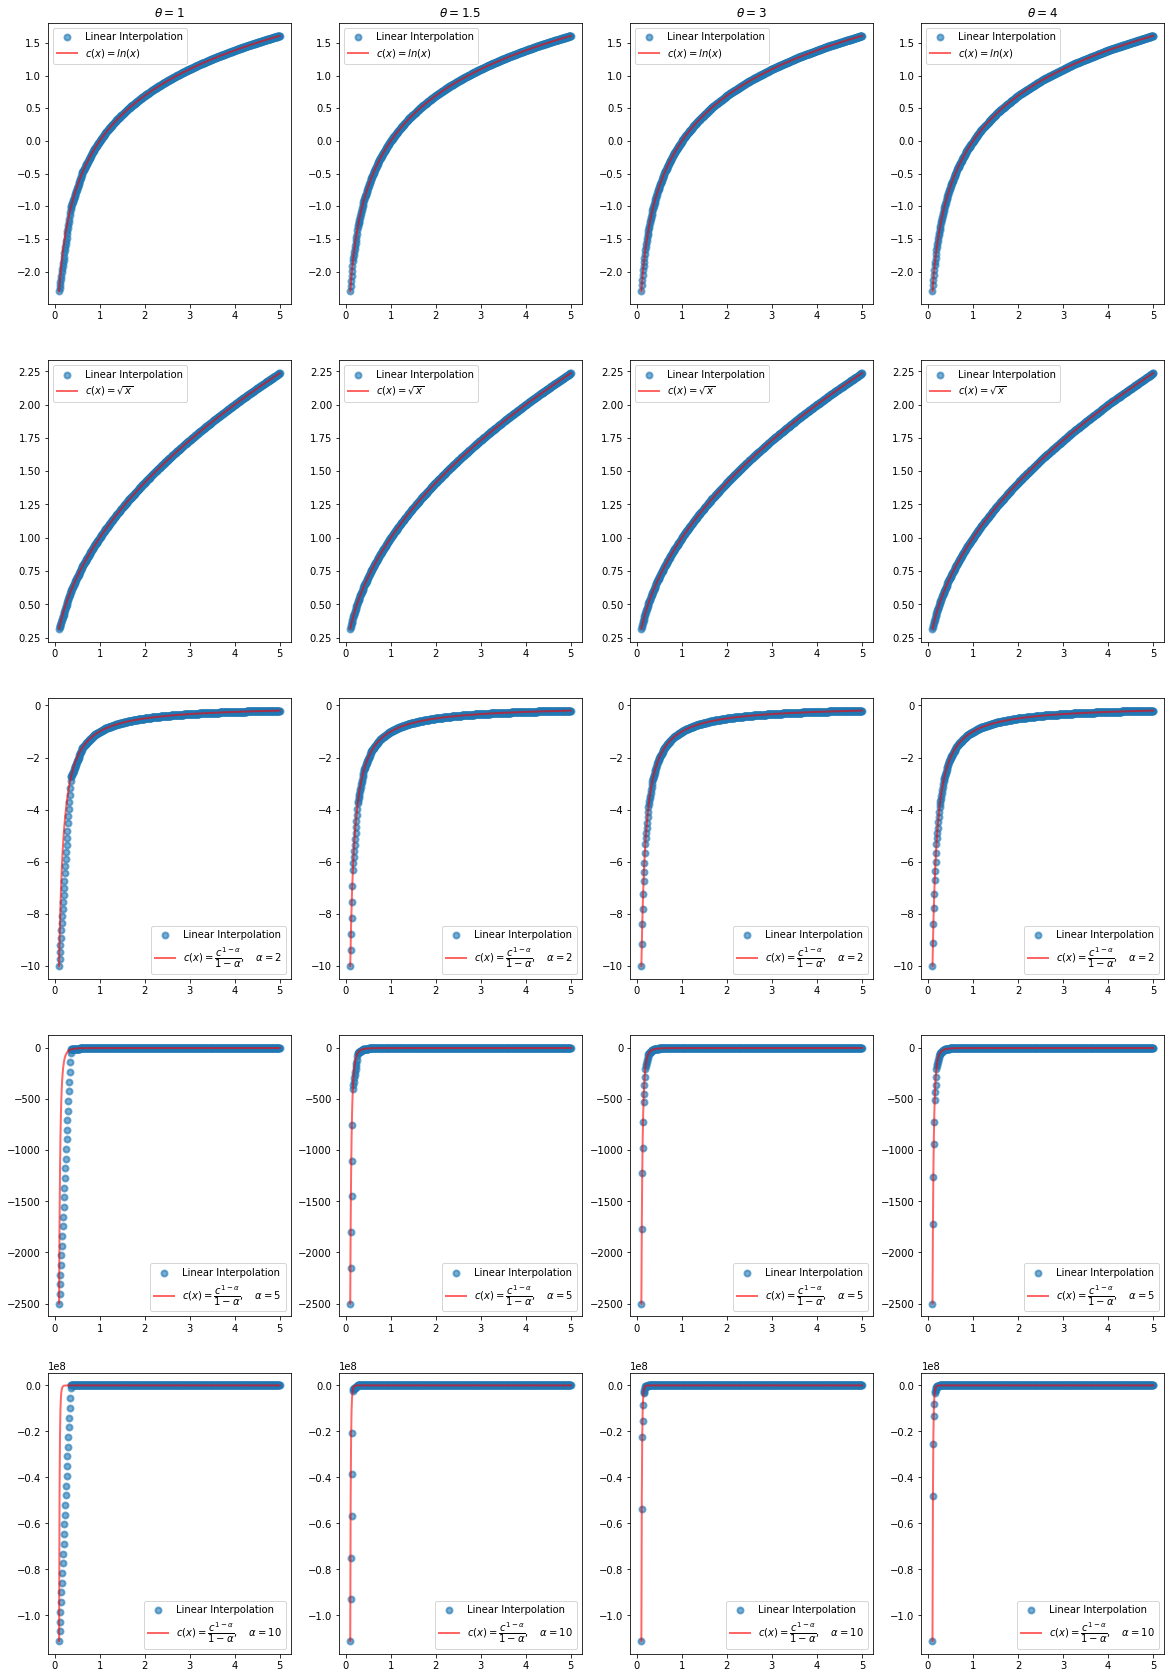

In [20]:
fig, ax = plt.subplots(5,4, figsize=(20,30))
ax[0,0].scatter(X, np.interp(X, Smart(20,1), u_1(Smart(20,1))), linewidth=2, label='Linear Interpolation', alpha=0.6)
ax[0,0].plot(X, u_1(X), 'r-', linewidth=2, label=r'$c(x)=ln(x)$', alpha=0.6)
ax[0,0].legend()
ax[0,0].set_title(r'$\theta = 1$')
ax[1,0].scatter(X, np.interp(X, Smart(20,1), u_2(Smart(20,1))), linewidth=2, label='Linear Interpolation', alpha=0.6)
ax[1,0].plot(X, u_2(X), 'r-', linewidth=2, label=r'$c(x)=\sqrt{x}$', alpha=0.6)
ax[1,0].legend()
ax[2,0].scatter(X, np.interp(X, Smart(20,1), u_3(Smart(20,1), 2)), linewidth=2, label='Linear Interpolation', alpha=0.6)
ax[2,0].plot(X, u_3(X, 2), 'r-', linewidth=2, label=r'$c(x)=\dfrac{c^{1-\alpha}}{1-\alpha}, \quad \alpha = 2$', alpha=0.6)
ax[2,0].legend()
ax[3,0].scatter(X, np.interp(X, Smart(20,1), u_3(Smart(20,1), 5)), linewidth=2, label='Linear Interpolation', alpha=0.6)
ax[3,0].plot(X, u_3(X, 5), 'r-', linewidth=2, label=r'$c(x)=\dfrac{c^{1-\alpha}}{1-\alpha}, \quad \alpha = 5$', alpha=0.6)
ax[3,0].legend()
ax[4,0].scatter(X, np.interp(X, Smart(20,1), u_3(Smart(20,1), 10)), linewidth=2, label='Linear Interpolation', alpha=0.6)
ax[4,0].plot(X, u_3(X, 10), 'r-', linewidth=2, label=r'$c(x)=\dfrac{c^{1-\alpha}}{1-\alpha}, \quad \alpha = 10$', alpha=0.6)
ax[4,0].legend()

ax[0,1].scatter(X, np.interp(X, Smart(20,1.5), u_1(Smart(20,1.5))), linewidth=2, label='Linear Interpolation', alpha=0.6)
ax[0,1].plot(X, u_1(X), 'r-', linewidth=2, label=r'$c(x)=ln(x)$', alpha=0.6)
ax[0,1].legend()
ax[0,1].set_title(r'$\theta = 1.5$')
ax[1,1].scatter(X, np.interp(X, Smart(20,1.5), u_2(Smart(20,1.5))), linewidth=2, label='Linear Interpolation', alpha=0.6)
ax[1,1].plot(X, u_2(X), 'r-', linewidth=2, label=r'$c(x)=\sqrt{x}$', alpha=0.6)
ax[1,1].legend()
ax[2,1].scatter(X, np.interp(X, Smart(20,1.5), u_3(Smart(20,1.5), 2)), linewidth=2, label='Linear Interpolation', alpha=0.6)
ax[2,1].plot(X, u_3(X, 2), 'r-', linewidth=2, label=r'$c(x)=\dfrac{c^{1-\alpha}}{1-\alpha}, \quad \alpha = 2$', alpha=0.6)
ax[2,1].legend()
ax[3,1].scatter(X, np.interp(X, Smart(20,1.5), u_3(Smart(20,1.5), 5)), linewidth=2, label='Linear Interpolation', alpha=0.6)
ax[3,1].plot(X, u_3(X, 5), 'r-', linewidth=2, label=r'$c(x)=\dfrac{c^{1-\alpha}}{1-\alpha}, \quad \alpha = 5$', alpha=0.6)
ax[3,1].legend()
ax[4,1].scatter(X, np.interp(X, Smart(20,1.5), u_3(Smart(20,1.5), 10)), linewidth=2, label='Linear Interpolation', alpha=0.6)
ax[4,1].plot(X, u_3(X, 10), 'r-', linewidth=2, label=r'$c(x)=\dfrac{c^{1-\alpha}}{1-\alpha}, \quad \alpha = 10$', alpha=0.6)
ax[4,1].legend()

ax[0,2].scatter(X, np.interp(X, Smart(20,3), u_1(Smart(20,3))), linewidth=2, label='Linear Interpolation', alpha=0.6)
ax[0,2].plot(X, u_1(X), 'r-', linewidth=2, label=r'$c(x)=ln(x)$', alpha=0.6)
ax[0,2].legend()
ax[0,2].set_title(r'$\theta = 3$')
ax[1,2].scatter(X, np.interp(X, Smart(20,3), u_2(Smart(20,3))), linewidth=2, label='Linear Interpolation', alpha=0.6)
ax[1,2].plot(X, u_2(X), 'r-', linewidth=2, label=r'$c(x)=\sqrt{x}$', alpha=0.6)
ax[1,2].legend()
ax[2,2].scatter(X, np.interp(X, Smart(20,3), u_3(Smart(20,3), 2)), linewidth=2, label='Linear Interpolation', alpha=0.6)
ax[2,2].plot(X, u_3(X, 2), 'r-', linewidth=2, label=r'$c(x)=\dfrac{c^{1-\alpha}}{1-\alpha}, \quad \alpha = 2$', alpha=0.6)
ax[2,2].legend()
ax[3,2].scatter(X, np.interp(X, Smart(20,3), u_3(Smart(20,3), 5)), linewidth=2, label='Linear Interpolation', alpha=0.6)
ax[3,2].plot(X, u_3(X, 5), 'r-', linewidth=2, label=r'$c(x)=\dfrac{c^{1-\alpha}}{1-\alpha}, \quad \alpha = 5$', alpha=0.6)
ax[3,2].legend()
ax[4,2].scatter(X, np.interp(X, Smart(20,3), u_3(Smart(20,3), 10)), linewidth=2, label='Linear Interpolation', alpha=0.6)
ax[4,2].plot(X, u_3(X, 10), 'r-', linewidth=2, label=r'$c(x)=\dfrac{c^{1-\alpha}}{1-\alpha}, \quad \alpha = 10$', alpha=0.6)
ax[4,2].legend()

ax[0,3].scatter(X, np.interp(X, Smart(20,4), u_1(Smart(20,4))), linewidth=2, label='Linear Interpolation', alpha=0.6)
ax[0,3].plot(X, u_1(X), 'r-', linewidth=2, label=r'$c(x)=ln(x)$', alpha=0.6)
ax[0,3].legend()
ax[0,3].set_title(r'$\theta = 4$')
ax[1,3].scatter(X, np.interp(X, Smart(20,4), u_2(Smart(20,4))), linewidth=2, label='Linear Interpolation', alpha=0.6)
ax[1,3].plot(X, u_2(X), 'r-', linewidth=2, label=r'$c(x)=\sqrt{x}$', alpha=0.6)
ax[1,3].legend()
ax[2,3].scatter(X, np.interp(X, Smart(20,4), u_3(Smart(20,4), 2)), linewidth=2, label='Linear Interpolation', alpha=0.6)
ax[2,3].plot(X, u_3(X, 2), 'r-', linewidth=2, label=r'$c(x)=\dfrac{c^{1-\alpha}}{1-\alpha}, \quad \alpha = 2$', alpha=0.6)
ax[2,3].legend()
ax[3,3].scatter(X, np.interp(X, Smart(20,4), u_3(Smart(20,4), 5)), linewidth=2, label='Linear Interpolation', alpha=0.6)
ax[3,3].plot(X, u_3(X, 5), 'r-', linewidth=2, label=r'$c(x)=\dfrac{c^{1-\alpha}}{1-\alpha}, \quad \alpha = 5$', alpha=0.6)
ax[3,3].legend()
ax[4,3].scatter(X, np.interp(X, Smart(20,4), u_3(Smart(20,4), 10)), linewidth=2, label='Linear Interpolation', alpha=0.6)
ax[4,3].plot(X, u_3(X, 10), 'r-', linewidth=2, label=r'$c(x)=\dfrac{c^{1-\alpha}}{1-\alpha}, \quad \alpha = 10$', alpha=0.6)
ax[4,3].legend()
plt.show()

As we can see, linear interpolation has multiple problems:

* Multiple kinks
* Does not preserve the shape of the utilty functions.
The first problem araises by construction, while the second one can be improved if we impose more structure on the derivatives of the interpolated function.

Although we can see that working with an expanding grid seems to improve the interpolation.

## Method 2: Cubic Splines

Cubic splines satisfy three properties:

* Matches the function value at grid points $(y_1,y_2,...,y_n)$.
* Generates first derivatives that are continuous and differentiable for all $x\in[x_1,x_n]$ 
* Generates second derivatives that are continuous for all values $x\in[x_1,x_n]$.
 

With the linear interpolation method, for any $x$ that lies between two knots, $x_{i}$ and $x_{i+1}$ we have that the linear interpolant:

$$
    y(x)=A(x)y_j + B(x)y_{j+1}
$$

where $A(x)=\frac{x_{j+1}-x}{x_{j+1}-x_{j}}$ and $B(x)= 1-A = \frac{x-x_j}{x_{j+1}-x_j}$.


In order to solve for the problems outlines before, we are going to modify the linear interpolation method to allow for differentiable first derivatives and continuous derivatives at all points. A more general version of the previous equation is given by:

$$
y(x)=A(x) y_j+B(x) y_{j+1}+C(x) y_j^{\prime \prime}+D(x) y_{j+1}^{\prime \prime}
$$
where
$$
C(x)=\frac{1}{6}\left(A^3(x)-A(x)\right)\left(x_{j+1}-x_j\right)^2
$$
and
$$
D(x)=\frac{1}{6}\left(B^3(x)-B(x)\right)\left(x_{j+1}-x_j\right)^2 .
$$

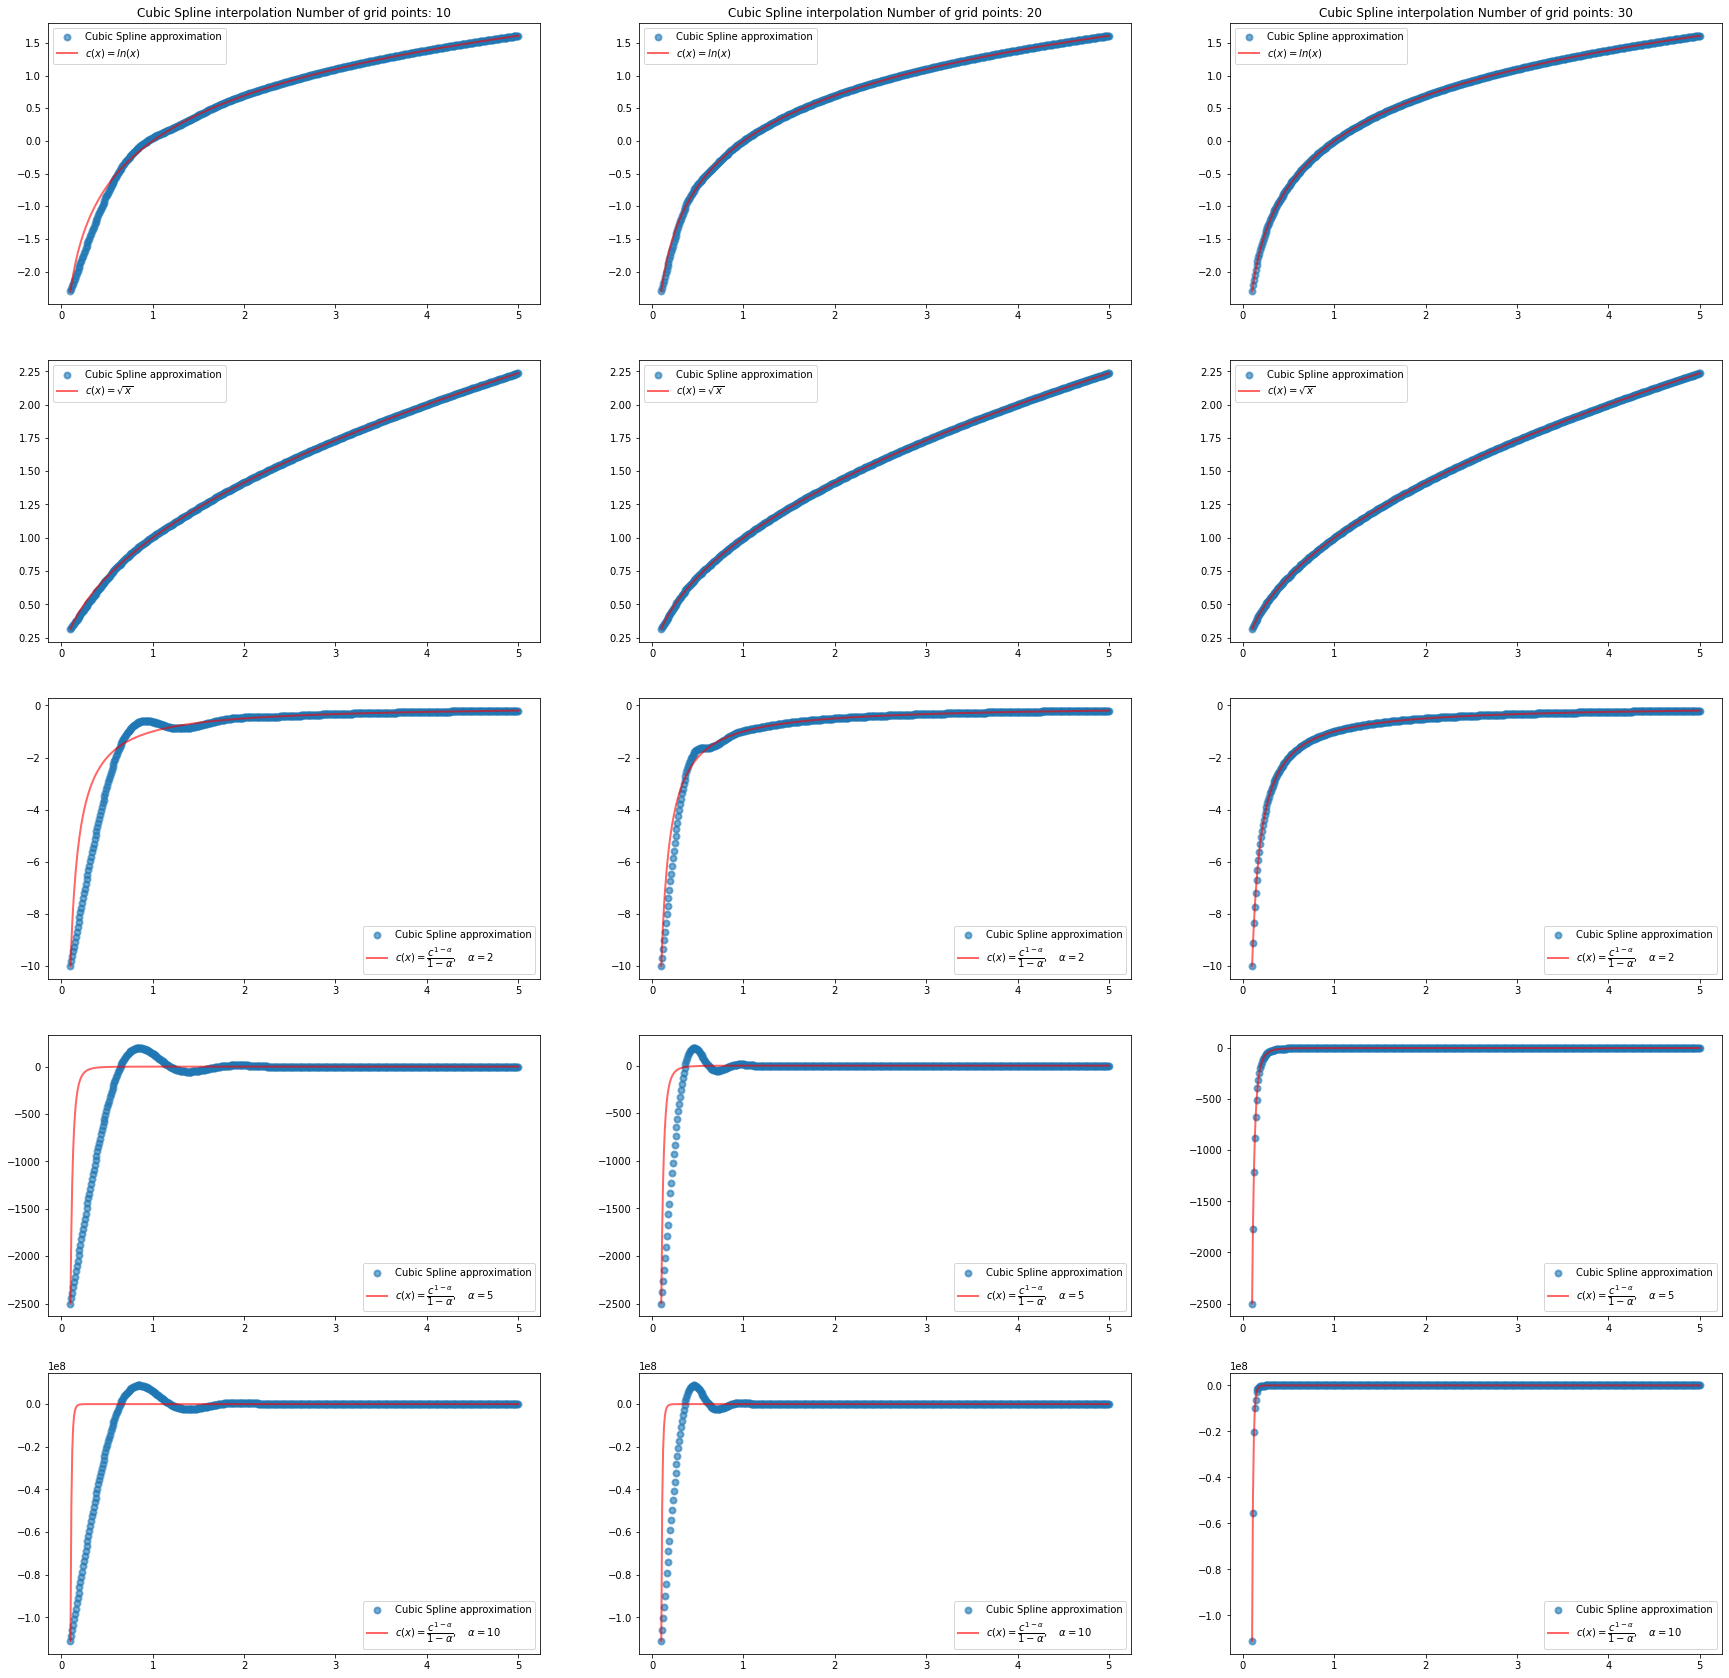

In [18]:
fig, ax = plt.subplots(5,3, figsize=(30,30))

f1 = CubicSpline(Y1, u_1(Y1), bc_type="natural")
f2 = CubicSpline(Y1, u_2(Y1), bc_type="natural")
f3_2 = CubicSpline(Y1, u_3(Y1, 2), bc_type="natural")
f3_5 = CubicSpline(Y1, u_3(Y1, 5), bc_type="natural")
f3_10 = CubicSpline(Y1, u_3(Y1, 10), bc_type="natural")

ax[0,0].scatter(X, f1(X), linewidth=2, label='Cubic Spline approximation', alpha=0.6)
ax[0,0].plot(X, u_1(X), 'r-', linewidth=2, label=r'$c(x)=ln(x)$', alpha=0.6)
ax[0,0].legend()
ax[0,0].set_title('Cubic Spline interpolation Number of grid points: 10')
ax[1,0].scatter(X, f2(X), linewidth=2, label='Cubic Spline approximation', alpha=0.6)
ax[1,0].plot(X, u_2(X), 'r-', linewidth=2, label=r'$c(x)=\sqrt{x}$', alpha=0.6)
ax[1,0].legend()
ax[2,0].scatter(X, f3_2(X), linewidth=2, label='Cubic Spline approximation', alpha=0.6)
ax[2,0].plot(X, u_3(X, 2), 'r-', linewidth=2, label=r'$c(x)=\dfrac{c^{1-\alpha}}{1-\alpha}, \quad \alpha = 2$', alpha=0.6)
ax[2,0].legend()
ax[3,0].scatter(X, f3_5(X), linewidth=2, label='Cubic Spline approximation', alpha=0.6)
ax[3,0].plot(X, u_3(X, 5), 'r-', linewidth=2, label=r'$c(x)=\dfrac{c^{1-\alpha}}{1-\alpha}, \quad \alpha = 5$', alpha=0.6)
ax[3,0].legend()
ax[4,0].scatter(X, f3_10(X), linewidth=2, label='Cubic Spline approximation', alpha=0.6)
ax[4,0].plot(X, u_3(X, 10), 'r-', linewidth=2, label=r'$c(x)=\dfrac{c^{1-\alpha}}{1-\alpha}, \quad \alpha = 10$', alpha=0.6)
ax[4,0].legend()

f1 = CubicSpline(Y2, u_1(Y2), bc_type="natural")
f2 = CubicSpline(Y2, u_2(Y2), bc_type="natural")
f3_2 = CubicSpline(Y2, u_3(Y2, 2), bc_type="natural")
f3_5 = CubicSpline(Y2, u_3(Y2, 5), bc_type="natural")
f3_10 = CubicSpline(Y2, u_3(Y2, 10), bc_type="natural")

ax[0,1].scatter(X, f1(X), linewidth=2, label='Cubic Spline approximation', alpha=0.6)
ax[0,1].plot(X, u_1(X), 'r-', linewidth=2, label=r'$c(x)=ln(x)$', alpha=0.6)
ax[0,1].legend()
ax[0,1].set_title('Cubic Spline interpolation Number of grid points: 20')
ax[1,1].scatter(X, f2(X), linewidth=2, label='Cubic Spline approximation', alpha=0.6)
ax[1,1].plot(X, u_2(X), 'r-', linewidth=2, label=r'$c(x)=\sqrt{x}$', alpha=0.6)
ax[1,1].legend()
ax[2,1].scatter(X, f3_2(X), linewidth=2, label='Cubic Spline approximation', alpha=0.6)
ax[2,1].plot(X, u_3(X, 2), 'r-', linewidth=2, label=r'$c(x)=\dfrac{c^{1-\alpha}}{1-\alpha}, \quad \alpha = 2$', alpha=0.6)
ax[2,1].legend()
ax[3,1].scatter(X, f3_5(X), linewidth=2, label='Cubic Spline approximation', alpha=0.6)
ax[3,1].plot(X, u_3(X, 5), 'r-', linewidth=2, label=r'$c(x)=\dfrac{c^{1-\alpha}}{1-\alpha}, \quad \alpha = 5$', alpha=0.6)
ax[3,1].legend()
ax[4,1].scatter(X, f3_10(X), linewidth=2, label='Cubic Spline approximation', alpha=0.6)
ax[4,1].plot(X, u_3(X, 10), 'r-', linewidth=2, label=r'$c(x)=\dfrac{c^{1-\alpha}}{1-\alpha}, \quad \alpha = 10$', alpha=0.6)
ax[4,1].legend()


f1 = CubicSpline(Y3, u_1(Y3), bc_type="natural")
f2 = CubicSpline(Y3, u_2(Y3), bc_type="natural")
f3_2 = CubicSpline(Y3, u_3(Y3, 2), bc_type="natural")
f3_5 = CubicSpline(Y3, u_3(Y3, 5), bc_type="natural")
f3_10 = CubicSpline(Y3, u_3(Y3, 10), bc_type="natural")


ax[0,2].scatter(X, f1(X), linewidth=2, label='Cubic Spline approximation', alpha=0.6)
ax[0,2].plot(X, u_1(X), 'r-', linewidth=2, label=r'$c(x)=ln(x)$', alpha=0.6)
ax[0,2].legend()
ax[0,2].set_title('Cubic Spline interpolation Number of grid points: 30')
ax[1,2].scatter(X, f2(X), linewidth=2, label='Cubic Spline approximation', alpha=0.6)
ax[1,2].plot(X, u_2(X), 'r-', linewidth=2, label=r'$c(x)=\sqrt{x}$', alpha=0.6)
ax[1,2].legend()
ax[2,2].scatter(X, f3_2(X), linewidth=2, label='Cubic Spline approximation', alpha=0.6)
ax[2,2].plot(X, u_3(X, 2), 'r-', linewidth=2, label=r'$c(x)=\dfrac{c^{1-\alpha}}{1-\alpha}, \quad \alpha = 2$', alpha=0.6)
ax[2,2].legend()
ax[3,2].scatter(X, f3_5(X), linewidth=2, label='Cubic Spline approximation', alpha=0.6)
ax[3,2].plot(X, u_3(X, 5), 'r-', linewidth=2, label=r'$c(x)=\dfrac{c^{1-\alpha}}{1-\alpha}, \quad \alpha = 5$', alpha=0.6)
ax[3,2].legend()
ax[4,2].scatter(X, f3_10(X), linewidth=2, label='Cubic Spline approximation', alpha=0.6)
ax[4,2].plot(X, u_3(X, 10), 'r-', linewidth=2, label=r'$c(x)=\dfrac{c^{1-\alpha}}{1-\alpha}, \quad \alpha = 10$', alpha=0.6)
ax[4,2].legend()
plt.show()

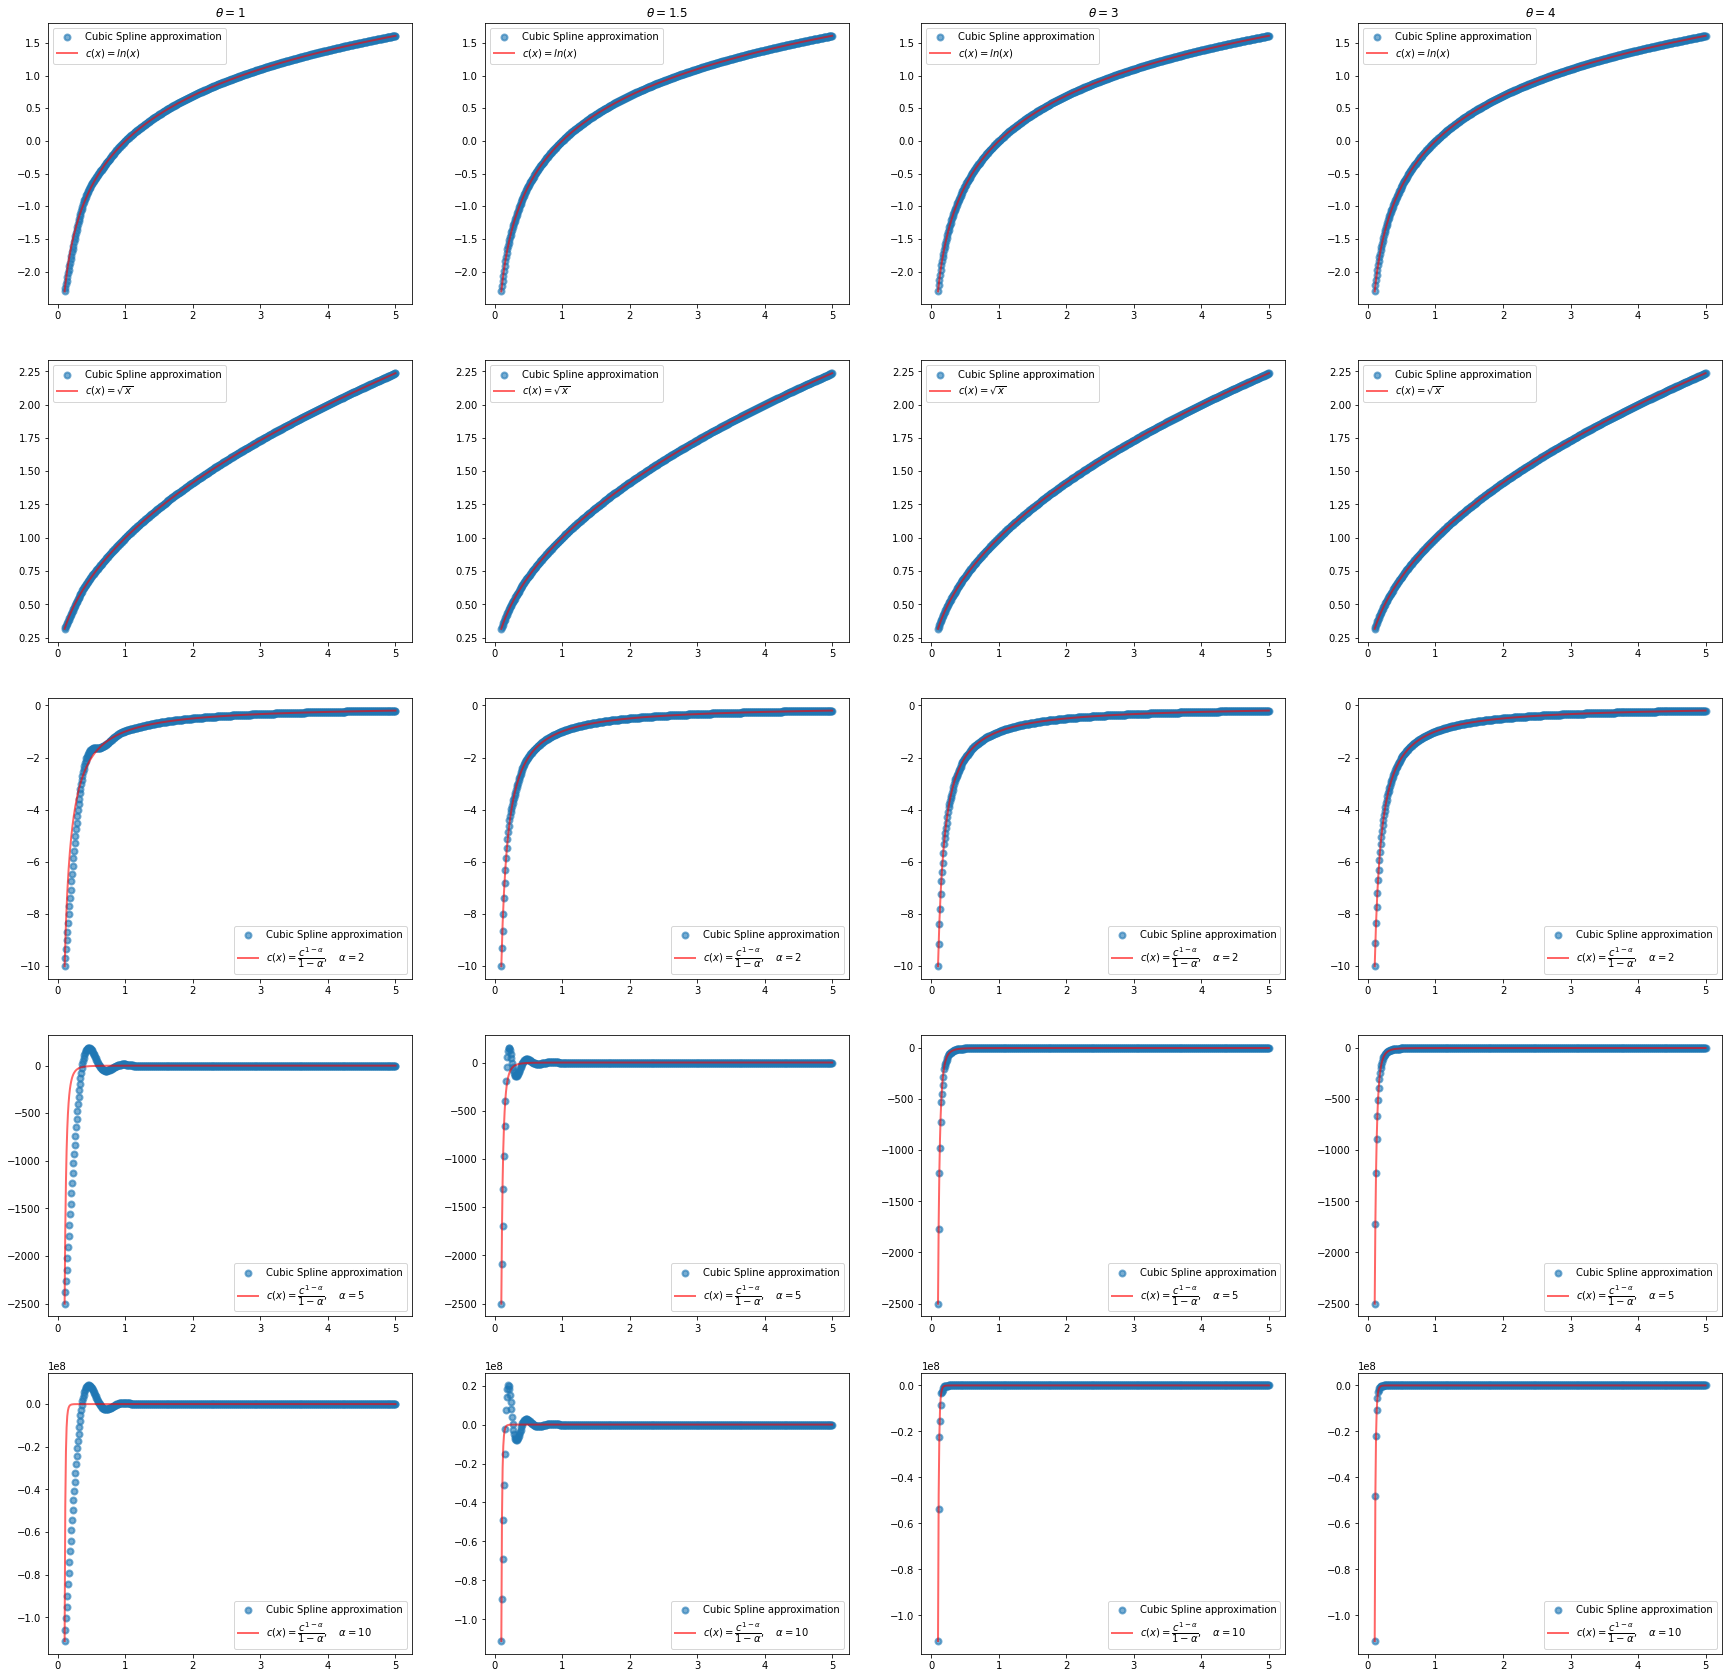

In [19]:
fig, ax = plt.subplots(5,4, figsize=(30,30))

f1 = CubicSpline(Smart(20,1), u_1(Smart(20,1)), bc_type="natural")
f2 = CubicSpline(Smart(20,1), u_2(Smart(20,1)), bc_type="natural")
f3_2 = CubicSpline(Smart(20,1), u_3(Smart(20,1), 2), bc_type="natural")
f3_5 = CubicSpline(Smart(20,1), u_3(Smart(20,1), 5), bc_type="natural")
f3_10 = CubicSpline(Smart(20,1), u_3(Smart(20,1), 10), bc_type="natural")


ax[0,0].scatter(X, f1(X), linewidth=2, label='Cubic Spline approximation', alpha=0.6)
ax[0,0].plot(X, u_1(X), 'r-', linewidth=2, label=r'$c(x)=ln(x)$', alpha=0.6)
ax[0,0].legend()
ax[0,0].set_title(r'$\theta = 1$')
ax[1,0].scatter(X, f2(X), linewidth=2, label='Cubic Spline approximation', alpha=0.6)
ax[1,0].plot(X, u_2(X), 'r-', linewidth=2, label=r'$c(x)=\sqrt{x}$', alpha=0.6)
ax[1,0].legend()
ax[2,0].scatter(X, f3_2(X), linewidth=2, label='Cubic Spline approximation', alpha=0.6)
ax[2,0].plot(X, u_3(X, 2), 'r-', linewidth=2, label=r'$c(x)=\dfrac{c^{1-\alpha}}{1-\alpha}, \quad \alpha = 2$', alpha=0.6)
ax[2,0].legend()
ax[3,0].scatter(X, f3_5(X), linewidth=2, label='Cubic Spline approximation', alpha=0.6)
ax[3,0].plot(X, u_3(X, 5), 'r-', linewidth=2, label=r'$c(x)=\dfrac{c^{1-\alpha}}{1-\alpha}, \quad \alpha = 5$', alpha=0.6)
ax[3,0].legend()
ax[4,0].scatter(X, f3_10(X), linewidth=2, label='Cubic Spline approximation', alpha=0.6)
ax[4,0].plot(X, u_3(X, 10), 'r-', linewidth=2, label=r'$c(x)=\dfrac{c^{1-\alpha}}{1-\alpha}, \quad \alpha = 10$', alpha=0.6)
ax[4,0].legend()

f1 = CubicSpline(Smart(20,1.5), u_1(Smart(20,1.5)), bc_type="natural")
f2 = CubicSpline(Smart(20,1.5), u_2(Smart(20,1.5)), bc_type="natural")
f3_2 = CubicSpline(Smart(20,1.5), u_3(Smart(20,1.5), 2), bc_type="natural")
f3_5 = CubicSpline(Smart(20,1.5), u_3(Smart(20,1.5), 5), bc_type="natural")
f3_10 = CubicSpline(Smart(20,1.5), u_3(Smart(20,1.5), 10), bc_type="natural")


ax[0,1].scatter(X, f1(X), linewidth=2, label='Cubic Spline approximation', alpha=0.6)
ax[0,1].plot(X, u_1(X), 'r-', linewidth=2, label=r'$c(x)=ln(x)$', alpha=0.6)
ax[0,1].legend()
ax[0,1].set_title(r'$\theta = 1.5$')
ax[1,1].scatter(X, f2(X), linewidth=2, label='Cubic Spline approximation', alpha=0.6)
ax[1,1].plot(X, u_2(X), 'r-', linewidth=2, label=r'$c(x)=\sqrt{x}$', alpha=0.6)
ax[1,1].legend()
ax[2,1].scatter(X, f3_2(X), linewidth=2, label='Cubic Spline approximation', alpha=0.6)
ax[2,1].plot(X, u_3(X, 2), 'r-', linewidth=2, label=r'$c(x)=\dfrac{c^{1-\alpha}}{1-\alpha}, \quad \alpha = 2$', alpha=0.6)
ax[2,1].legend()
ax[3,1].scatter(X, f3_5(X), linewidth=2, label='Cubic Spline approximation', alpha=0.6)
ax[3,1].plot(X, u_3(X, 5), 'r-', linewidth=2, label=r'$c(x)=\dfrac{c^{1-\alpha}}{1-\alpha}, \quad \alpha = 5$', alpha=0.6)
ax[3,1].legend()
ax[4,1].scatter(X, f3_10(X), linewidth=2, label='Cubic Spline approximation', alpha=0.6)
ax[4,1].plot(X, u_3(X, 10), 'r-', linewidth=2, label=r'$c(x)=\dfrac{c^{1-\alpha}}{1-\alpha}, \quad \alpha = 10$', alpha=0.6)
ax[4,1].legend()

f1 = CubicSpline(Smart(20,3), u_1(Smart(20,3)), bc_type="natural")
f2 = CubicSpline(Smart(20,3), u_2(Smart(20,3)), bc_type="natural")
f3_2 = CubicSpline(Smart(20,3), u_3(Smart(20,3), 2), bc_type="natural")
f3_5 = CubicSpline(Smart(20,3), u_3(Smart(20,3), 5), bc_type="natural")
f3_10 = CubicSpline(Smart(20,3), u_3(Smart(20,3), 10), bc_type="natural")


ax[0,2].scatter(X, f1(X), linewidth=2, label='Cubic Spline approximation', alpha=0.6)
ax[0,2].plot(X, u_1(X), 'r-', linewidth=2, label=r'$c(x)=ln(x)$', alpha=0.6)
ax[0,2].legend()
ax[0,2].set_title(r'$\theta = 3$')
ax[1,2].scatter(X, f2(X), linewidth=2, label='Cubic Spline approximation', alpha=0.6)
ax[1,2].plot(X, u_2(X), 'r-', linewidth=2, label=r'$c(x)=\sqrt{x}$', alpha=0.6)
ax[1,2].legend()
ax[2,2].scatter(X, np.interp(X, Smart(20,3), u_3(Smart(20,3), 2)), linewidth=2, label='Cubic Spline approximation', alpha=0.6)
ax[2,2].plot(X, u_3(X, 2), 'r-', linewidth=2, label=r'$c(x)=\dfrac{c^{1-\alpha}}{1-\alpha}, \quad \alpha = 2$', alpha=0.6)
ax[2,2].legend()
ax[3,2].scatter(X, np.interp(X, Smart(20,3), u_3(Smart(20,3), 5)), linewidth=2, label='Cubic Spline approximation', alpha=0.6)
ax[3,2].plot(X, u_3(X, 5), 'r-', linewidth=2, label=r'$c(x)=\dfrac{c^{1-\alpha}}{1-\alpha}, \quad \alpha = 5$', alpha=0.6)
ax[3,2].legend()
ax[4,2].scatter(X, np.interp(X, Smart(20,3), u_3(Smart(20,3), 10)), linewidth=2, label='Cubic Spline approximation', alpha=0.6)
ax[4,2].plot(X, u_3(X, 10), 'r-', linewidth=2, label=r'$c(x)=\dfrac{c^{1-\alpha}}{1-\alpha}, \quad \alpha = 10$', alpha=0.6)
ax[4,2].legend()

f1 = CubicSpline(Smart(20,4), u_1(Smart(20,4)), bc_type="natural")
f2 = CubicSpline(Smart(20,4), u_2(Smart(20,4)), bc_type="natural")
f3_2 = CubicSpline(Smart(20,4), u_3(Smart(20,4), 2), bc_type="natural")
f3_5 = CubicSpline(Smart(20,4), u_3(Smart(20,4), 5), bc_type="natural")
f3_10 = CubicSpline(Smart(20,4), u_3(Smart(20,4), 10), bc_type="natural")


ax[0,3].scatter(X, f1(X), linewidth=2, label='Cubic Spline approximation', alpha=0.6)
ax[0,3].plot(X, u_1(X), 'r-', linewidth=2, label=r'$c(x)=ln(x)$', alpha=0.6)
ax[0,3].legend()
ax[0,3].set_title(r'$\theta = 4$')
ax[1,3].scatter(X, f2(X), linewidth=2, label='Cubic Spline approximation', alpha=0.6)
ax[1,3].plot(X, u_2(X), 'r-', linewidth=2, label=r'$c(x)=\sqrt{x}$', alpha=0.6)
ax[1,3].legend()
ax[2,3].scatter(X, f3_2(X), linewidth=2, label='Cubic Spline approximation', alpha=0.6)
ax[2,3].plot(X, u_3(X, 2), 'r-', linewidth=2, label=r'$c(x)=\dfrac{c^{1-\alpha}}{1-\alpha}, \quad \alpha = 2$', alpha=0.6)
ax[2,3].legend()
ax[3,3].scatter(X, f3_5(X), linewidth=2, label='Cubic Spline approximation', alpha=0.6)
ax[3,3].plot(X, u_3(X, 5), 'r-', linewidth=2, label=r'$c(x)=\dfrac{c^{1-\alpha}}{1-\alpha}, \quad \alpha = 5$', alpha=0.6)
ax[3,3].legend()
ax[4,3].scatter(X, f3_10(X), linewidth=2, label='Cubic Spline approximation', alpha=0.6)
ax[4,3].plot(X, u_3(X, 10), 'r-', linewidth=2, label=r'$c(x)=\dfrac{c^{1-\alpha}}{1-\alpha}, \quad \alpha = 10$', alpha=0.6)
ax[4,3].legend()
plt.show()

For this exercise we imposed the boundary to be such that the second derivative at curve ends are zero.

In [10]:
fun_list = [u_1,u_2, u_3_2, u_3_5, u_3_10]
grid_lst = [Y1, Y2, Y3, Smart(grid=10, θ= 1.5), Smart(grid=20, θ= 1.5), Smart(grid=30, θ= 1.5), Smart(grid=10, θ= 3), Smart(grid=20, θ= 3), Smart(grid=30, θ= 3)]
max_error = np.zeros((5,9))

for i,fun in enumerate(fun_list):
    for j,grid in enumerate(grid_lst):
        cs = CubicSpline(grid, fun(grid))
        max_error[i,j] = np.nanmax(np.abs((cs(X) - fun(X))/fun(X)))

df = pd.DataFrame(max_error, columns=['10', '20', '30', 'θ =1.5, 10','θ =1.5, 20','θ =1.5, 30','θ =3, 10','θ =3, 20','θ =3, 30'],
index=['log utility','sqrt utility', 'power utility, a=2','power utility, a=5','power utility, a=10'])


The errors of cubic spline approximation for each grid are given in the following table: (numbers in the column represents grid size)

In [11]:
df

,10,20,30,"θ =1.5, 10","θ =1.5, 20","θ =1.5, 30","θ =3, 10","θ =3, 20","θ =3, 30"
log utility,1.517106e+01,6.645512e-01,0.000023,1.500622e+00,5.489868e-03,0.003213,7.425605e-02,1.963407e-02,0.006753
sqrt utility,4.295033e-02,1.484666e-02,0.000008,1.111016e-02,1.002287e-03,0.000167,5.287958e-04,2.115095e-05,0.000004
"power utility, a=2",6.255854e-01,2.135869e-01,0.000188,2.214766e-01,2.320763e-02,0.004383,1.444794e-02,5.953724e-04,0.000097
"power utility, a=5",5.598641e+02,3.646668e+01,0.005483,1.106403e+03,6.543765e+00,0.375824,1.047786e+03,2.869899e-02,0.004102
"power utility, a=10",2.971075e+10,1.112218e+07,0.059162,2.821402e+11,3.267341e+06,12021.907325,9.842724e+12,3.033188e+06,0.428446


In [12]:
fun_list = [u_1,u_2, u_3_2, u_3_5, u_3_10]
grid_lst = [Y1, Y2, Y3, Smart(grid=10, θ= 1.5), Smart(grid=20, θ= 1.5), Smart(grid=30, θ= 1.5), Smart(grid=10, θ= 3), Smart(grid=20, θ= 3), Smart(grid=30, θ= 3)]
max_error_lin = np.zeros((5,9))

for i,fun in enumerate(fun_list):
    for j,grid in enumerate(grid_lst):
        max_error_lin[i,j] = np.max(np.abs((np.interp(X,grid,fun(grid)) - fun(X))/fun(X)))

df2 = pd.DataFrame(max_error_lin, columns=['10', '20', '30', 'θ =1.5, 10','θ =1.5, 20','θ =1.5, 30','θ =3, 10','θ =3, 20','θ =3, 30'],
index=['log utility','sqrt utility', 'power utility, a=2','power utility, a=5','power utility, a=10'])

The errors of linear interpolation approximation for each grid are given in the following table: (numbers in the column represents grid size)

In [13]:
df2

,10,20,30,"θ =1.5, 10","θ =1.5, 20","θ =1.5, 30","θ =3, 10","θ =3, 20","θ =3, 30"
log utility,24.544790,5.219475,0.004026,6.667034,1.758072,1.505329,8.106222,3.186001,2.093828
sqrt utility,0.099460,0.048737,0.000681,0.032557,0.008339,0.004080,0.012394,0.002902,0.001236
"power utility, a=2",1.149831,0.464523,0.005547,0.292290,0.068312,0.033118,0.103584,0.023299,0.009990
"power utility, a=5",166.452414,17.947163,0.057972,7.267548,0.868614,0.365597,1.467148,0.254353,0.103472
"power utility, a=10",879186.888728,5153.182017,0.286453,659.910622,9.349042,2.550553,23.855263,1.568072,0.529942


As you can see, the cubic spline did a better job than linear interpolation. And exponential grid did a better job than evenly spaced grid

## Method 3: Chebyshev Polynomials

In [13]:
fun_list = [u_1,u_2, u_3_2, u_3_5, u_3_10]
max_error_cheb = np.zeros((5,5))

for i,fun in enumerate(fun_list):
    for j,cheby in enumerate([1,2,4,8, 12]):
        cheb_appx = np.polynomial.chebyshev.Chebyshev.interpolate(fun,deg=cheby, domain=[0.1,5])
        max_error_cheb[i,j] = np.max(np.abs((cheb_appx(X) - fun(X))/fun(X)))

df3 = pd.DataFrame(max_error_cheb, columns=['deg = 1', 'deg = 2', 'deg = 4', 'deg = 8', 'deg= 12'],
index=['log utility','sqrt utility', 'power utility, a=2','power utility, a=5','power utility, a=10'])

The errors of chebyshev polynomials approximation for each degree are given in the following table:

In [14]:
df3

,deg = 1,deg = 2,deg = 4,deg = 8,deg= 12
log utility,7.196497e+01,1.571974e+02,1.586418e+01,1.189170e+00,1.009559e+00
sqrt utility,1.096231e+00,5.015863e-01,1.524092e-01,2.307533e-02,4.534355e-03
"power utility, a=2",8.571939e-01,7.206633e-01,4.552181e-01,1.532722e-01,4.932972e-02
"power utility, a=5",2.884481e+02,1.655565e+03,8.425482e+03,1.661393e+04,1.327859e+04
"power utility, a=10",2.478057e+06,3.601608e+08,5.143276e+10,1.100542e+12,2.065210e+12


Chebyshev polynomials is not a good estimator. As you can see, even for logarithm utility, we need 8 degrees of Chebyshev polynomials which is too much. So the best is using exponential grid with cubic splines.

## Extrapolation

For cubic spline and linear interpolation, the best result was yielded from exponential grid of 30 with $\theta = 3$, that's why we will use that grid for extrapolation.
For chebyshev polynomial, we will use degree 8.


In [15]:
fun_list = [u_1,u_2, u_3_2, u_3_5, u_3_10]
numbers = [0.05,5.1,5.5,6]
error_list  = np.zeros((5,4,3))



for i,fun in enumerate(fun_list):
    cubic = CubicSpline(Smart(30,3), fun(Smart(30,3)))
    linear = interp1d(Smart(30,3), fun(Smart(30,3)),fill_value='extrapolate')
    cheb_appx = np.polynomial.chebyshev.Chebyshev.interpolate(fun,deg=8, domain=[0.1,5])
    for j,num in enumerate(numbers):
        error_list[i,j,0] = (cubic(num) - fun(num))/fun(num)
        error_list[i,j,1] = (linear(num) - fun(num))/fun(num)
        error_list[i,j,2] = (cheb_appx(num) - fun(num))/fun(num)

In [16]:
cubic_result = pd.DataFrame(error_list[:,:,0], columns=['0.05', '5.1', '5.5', '6'], index=['log utility','sqrt utility', 'power utility, a=2','power utility, a=5','power utility, a=10'])
linear_result = pd.DataFrame(error_list[:,:,1], columns=['0.05', '5.1', '5.5', '6'], index=['log utility','sqrt utility', 'power utility, a=2','power utility, a=5','power utility, a=10'])
cheby_result = pd.DataFrame(error_list[:,:,2], columns=['0.05', '5.1', '5.5', '6'], index=['log utility','sqrt utility', 'power utility, a=2','power utility, a=5','power utility, a=10'])

In [17]:
cubic_result

,0.05,5.1,5.5,6
log utility,-0.009071,0.000025,0.000356,0.001702
sqrt utility,0.005571,0.000006,0.000087,0.000420
"power utility, a=2",-0.063882,-0.000183,-0.002909,-0.015740
"power utility, a=5",-0.505954,-0.009183,-0.177042,-1.200977
"power utility, a=10",-0.929558,-1.058732,-25.225255,-231.331207


In [18]:
linear_result

,0.05,5.1,5.5,6
log utility,-0.064642,0.000765,0.005826,0.015717
sqrt utility,0.060838,0.000304,0.002364,0.006509
"power utility, a=2",-0.250501,-0.002614,-0.021941,-0.066053
"power utility, a=5",-0.813125,-0.030355,-0.298683,-1.087054
"power utility, a=10",-0.989345,-0.177919,-2.321859,-11.944896


In [19]:
cheby_result

,0.05,5.1,5.5,6
log utility,-0.148947,-1.308256e-02,-2.547118e-01,-2.052493e+00
sqrt utility,0.142228,-9.921001e-04,-1.948966e-02,-1.582789e-01
"power utility, a=2",-0.483197,1.000000e+00,2.192576e+01,2.021456e+02
"power utility, a=5",-0.970088,1.149701e+05,3.155737e+06,3.769728e+07
"power utility, a=10",-0.999807,8.408228e+12,3.366099e+14,6.211839e+15


Most of the cases, cubic spline gave the best result. However, linear approximation was a better estimator for the power utility with high $\gamma$ case.